## The aim of this checkpoint is to analyze credit scoring dataset in order to gain information from our data.
Instructions

Part 1: Univariate analysis

    Analyze the variable and conclude
    Analyze the Income variable and conclude.
    Analyze variable from your choice and conclude.(bonus)

Part 2: Bivariate analysis

Study the relation between the variable Amount and Income by calculating the correlation coefficient applying the linear regression

Part 3: Multivariate analysis

    Extract numerical data and apply the principal component analysis
    Select categorical variables and apply MCA 

Don’t forget to implement this work with both R and python

In [1]:
import pandas as pd

## Loading the data

In [4]:
credit_score = pd.read_csv('CleanCreditScoring.csv')

## Reading the Data

In [55]:
print(credit_score.shape)


(4446, 27)


In [5]:
credit_score.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"


In [6]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

In [9]:
credit_score.shape

(4446, 27)

In [11]:
credit_score.isnull().sum()

Status        0
Seniority     0
Home          0
Time          0
Age           0
Marital       0
Records       0
Job           0
Expenses      0
Income        0
Assets        0
Debt          0
Amount        0
Price         0
Finrat        0
Savings       0
seniorityR    0
timeR         0
ageR          0
expensesR     0
incomeR       0
assetsR       0
debtR         0
amountR       0
priceR        0
finratR       0
savingsR      0
dtype: int64

## Analysising the Dataset

In [12]:
credit_score.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


## Analyze the Income variable and conclude

In [15]:
credit_score['Income'].describe()

count    4446.000000
mean      140.629780
std        80.177896
min         1.000000
25%        90.000000
50%       124.000000
75%       170.000000
max       959.000000
Name: Income, dtype: float64

In [16]:
credit_score['Income'].sum()


625240

In [17]:
import numpy as np
var_income = np.var(credit_score['Income'])
print(var_income)

6427.049171656299


In [18]:
income_mode = credit_score['Income'].mode()
print(income_mode)

0    100
Name: Income, dtype: int64


## Relation between the variable Amount and Income by calculating the correlation coefficient applying the linear regression

In [19]:
correlation = np.corrcoef(credit_score['Income'], credit_score['Amount'])
print(correlation)

[[1.         0.19082011]
 [0.19082011 1.        ]]


In [32]:
from sklearn.linear_model import LinearRegression

x = np.array(credit_score['Income']).reshape(-1,1)
y = np.array(credit_score['Amount'])

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y) # This is the R^2 the coefficient of determination showing how well the model fits
print('coefficient of determination: ', r_sq)
print('intercept: ', model.intercept_) #This is the intercept of the model.
print('coef: ', model.coef_) #This is the coefficient of Regression. 

coefficient of determination:  0.036412315441911036
intercept:  879.8685090870313
coef:  [1.1298807]


# Linear regression equation:
### R^2 = 0.036
### Amount = 1.13*Income + 879.87

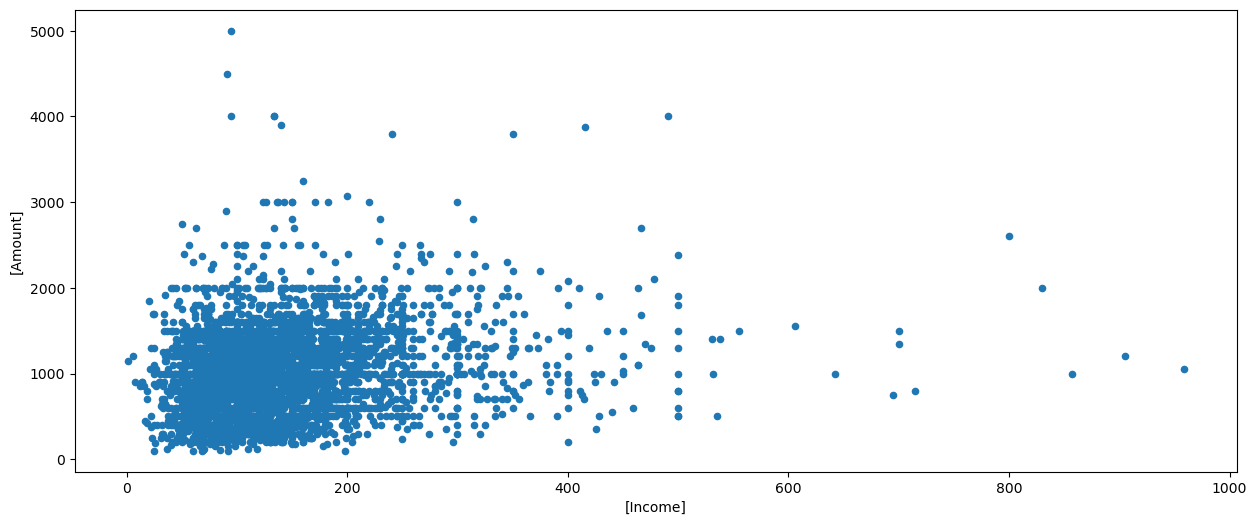

In [35]:
Plotting = credit_score.plot(x = ['Income'], y =['Amount'], kind = 'scatter', figsize = (15,6))

## Extracting numerical data and apply the principal component analysis

### Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

features = ['Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'] # Listing Numerical Values

x = credit_score.loc[:, features].values # Extracting values from the numerical list
x_standardize = StandardScaler().fit_transform(x)
x_standardize

array([[ 0.89138163, -0.14506601, -0.4643141 , -0.27500368, -0.50298319,
        -0.98090001],
       [-0.38944507, -0.12011868, -0.4643141 , -0.27500368, -0.08165963,
         0.31109689],
       [ 1.76234379,  0.74056443, -0.20419168, -0.27500368,  2.02495816,
         2.42252532],
       ...,
       [ 0.22535175, -0.63153907, -0.16083794, -0.27500368, -1.13496853,
        -0.79473789],
       [-0.338212  , -0.00785566, -0.4643141 , -0.27500368, -1.02963764,
        -1.45187425],
       [ 0.22535175, -0.00785566, -0.1174842 ,  0.52849665,  0.65565659,
         0.29836786]])

### Covariance matrix

In [43]:
covariant_credit_score = np.corrcoef(x.T)
print(covariant_credit_score)

[[1.         0.25500519 0.01893457 0.01477083 0.04953912 0.04072803]
 [0.25500519 1.         0.21911198 0.14469675 0.19082011 0.21778928]
 [0.01893457 0.21911198 1.         0.19161949 0.14428376 0.19489363]
 [0.01477083 0.14469675 0.19161949 1.         0.05090225 0.04391706]
 [0.04953912 0.19082011 0.14428376 0.05090225 1.         0.72502542]
 [0.04072803 0.21778928 0.19489363 0.04391706 0.72502542 1.        ]]


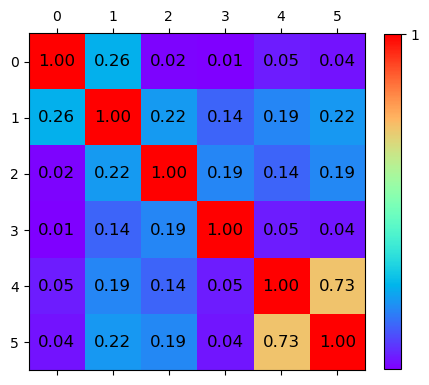

In [49]:
import matplotlib.pyplot as plt

img = plt.matshow(covariant_credit_score, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(covariant_credit_score.shape[0]):
    for y in range(covariant_credit_score.shape[1]):
        plt.text(x, y, "%0.2f" % covariant_credit_score[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

## Computing PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components=pca.fit_transform(x_standardize)
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2' , 'principal component 3'])
print(principalDF)


      principal component 1  principal component 2  principal component 3
0                 -0.983926               0.598264              -0.886512
1                 -0.173946              -0.585807              -0.053994
2                  3.063049              -0.733573              -1.748445
3                 -0.168162               0.386944              -0.617847
4                 -1.851842               0.222784               0.168940
...                     ...                    ...                    ...
4441              -0.909500               0.116177              -0.652411
4442              -0.604792              -0.057823               0.071930
4443              -1.436066               0.357244              -0.162264
4444              -1.715024               0.490905              -0.042476
4445               0.646164              -0.059366               0.046066

[4446 rows x 3 columns]


## Selecting categorical variables and apply MCA 

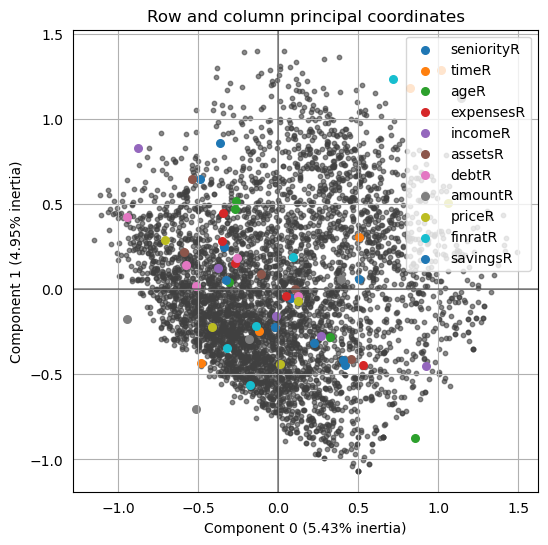

In [62]:
import prince

feature = ['seniorityR', 'timeR', 'ageR', 'expensesR', 'incomeR', 'assetsR', 'debtR', 'amountR', 'priceR',
           'finratR', 'savingsR' ]

m = credit_score.loc[:, feature]
#m.head()
mca = prince.MCA(n_components=2, n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(m)

ax = mca.plot_coordinates( X=m,
  ax=None,
   figsize=(6, 6),
 show_row_points=True,
  row_points_size=10,
 show_row_labels=False,
  show_column_points=True,
 column_points_size=30,
  show_column_labels=False,
  legend_n_cols=1 )
